In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import time
%matplotlib inline

<b> Image: Helix Nebula (https://apod.nasa.gov/apod/ap200823.html) </b>

# Question 1: Binary morphology

Original grayscale image


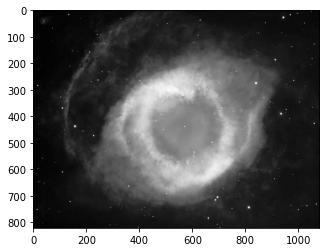

Inverted image


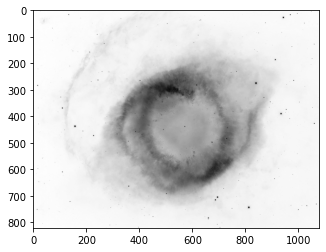

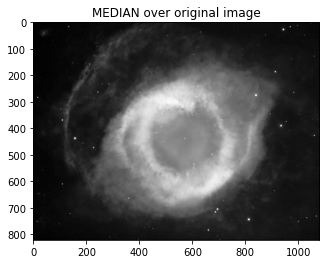

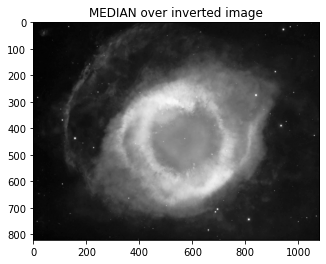

KeyboardInterrupt: 

In [2]:
def median_filter(image, window_size):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape
    template = []

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        a = x + int((window_size-1)/2)
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            b = y + int((window_size-1)/2)
            for c in range(window_size):
                for d in range(window_size):
                    template.append(image[b-d][a-c])
            template.sort()
            new_image[y][x] = template[int((int((window_size**2)) - 1) / 2)]
            template = []
    return new_image


def erosion(image, window_size, template, effect):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            minimum = 255
            for c in range(window_size):
                for d in range(window_size):
                    a = x - int((window_size-1)/2) - 1 + c
                    b = y - int((window_size-1)/2) - 1 + d
                    sub = image[b][a] - template[d][c]
                    if sub < minimum:
                        if sub > 0:
                            minimum = sub
            new_image[y][x] = int(minimum)
    if effect ==1 :
        for j1 in range(0,image.shape[0]):
            for j2 in range(0,image.shape[1]):
                if(new_image[j1][j2]==1):
                    new_image[j1][j2]=0
                else:
                    new_image[j1][j2]=1
    return new_image


def dilation(image, window_size, template, effect):
    new_image = np.zeros(image.shape, image.dtype)
    new_h, new_w= new_image.shape

    for x in range(int(window_size/2), new_w - int(window_size/2)):
        for y in range(int(window_size/2), new_h - int(window_size/2)):
            maximum = 0
            for c in range(window_size):
                for d in range(window_size):
                    a = x - int((window_size - 1) / 2) - 1 + c
                    b = y - int((window_size - 1) / 2) - 1 + d
                    sub = image[b][a] - template[d][c]
                    if sub > maximum:
                        if sub > 0:
                            maximum = sub
            new_image[y][x] = int(maximum)
    if effect ==1 :
        for j1 in range(0,image.shape[0]):
            for j2 in range(0,image.shape[1]):
                if(new_image[j1][j2]==1):
                    new_image[j1][j2]=0
                else:
                    new_image[j1][j2]=1
    return new_image

def square(n):
    window = np.ones([n,n])
    return window

def cross(n):
    mid = int((n-1)/2)
    window = np.zeros([n,n])
    h,w = window.shape
    for i in range(h):
        window[i][mid] = 1
        window[mid][i] = 1
    return window

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img_ori = plt.imread('helix_blancoHubble_1080.jpg')
img = rgb2gray(img_ori).astype(int)
plt.imshow(img, cmap='Greys_r')
print('Original grayscale image')
plt.show()
inv = np.invert(img) #### inverted image
plt.imshow(inv, cmap='Greys_r')
print('Inverted image')
plt.show()

#Change window size here
window = 3
template = square(window)

# Median Filter

new_img = median_filter(img, window)
plt.imshow(new_img, cmap='Greys_r')
plt.title('MEDIAN over original image')
plt.show()

new_img = median_filter(inv, window)
new_img = np.invert(new_img)
plt.imshow(new_img, cmap='Greys_r')
plt.title('MEDIAN over inverted image')
plt.show()


# Erosion and dilation dual

new_img = erosion(img, window, template, 0)
plt.imshow(new_img, cmap='Greys_r')
plt.title('EROSION over original Image')
plt.show()

new_img = dilation(inv, window, template, 1)
new_img = np.invert(new_img)
plt.imshow((new_img), cmap='Greys_r')
plt.title('Dilation over inverted image')
plt.show()

# Dilation and erosion dual

new_img = dilation(img, window, template, 0)
plt.imshow((new_img), cmap='Greys_r')
plt.title('Dilation over original image')
plt.show()

new_img = erosion(inv, window, template, 1)
new_img = np.invert(new_img)
plt.imshow((new_img), cmap='Greys_r')
plt.title('Erosion over inverted image')
plt.show()

# Question2: Gray Scale Operations

Grayscaled Original Image


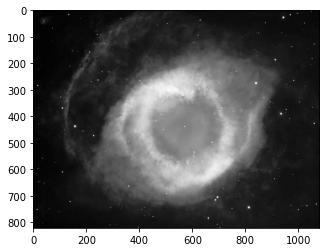

In [3]:
img_ori = plt.imread('helix_blancoHubble_1080.jpg')
img = (rgb2gray(img_ori)).astype(int)
plt.imshow(img, cmap='Greys_r')
print('Grayscaled Original Image')
plt.show()

bit_req=(int)(np.ceil(math.log((img.max()-img.min()),2)))

<b>2.1 Simple linear point operation with histogram comparison</b>

Image after point operation


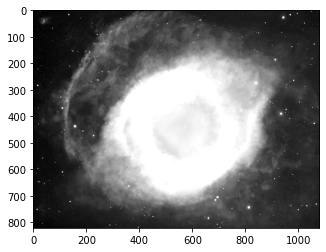

In [4]:
#J = P.I + L

p = 2 # change P here 
l = 0 # change L here
j = ((img*p)+l).astype(int)
result = np.where(j>255, 255, j)
result = np.where(result<0, 0, result)
plt.imshow(result, cmap='Greys_r')
print('Image after point operation')
plt.show()

Histogram after scaling


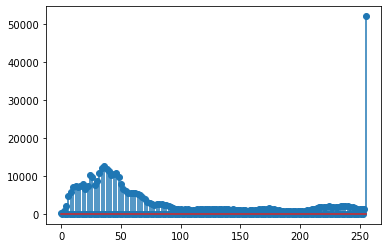

Original histogram after point operation 


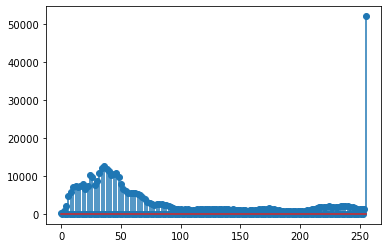

In [5]:
#finding histogram
def histogram(img):
    a = np.zeros((256,))
    h,w = img.shape
    for i in range(w):
        for j in range(h):
            g = int(img[j,i])
            a[g] = a[g]+1
    return a

o = histogram(result)

if l != 0 and p == 1:
    o = np.roll(o,l)
    plt.stem(o)
    print('Histogram after shifting')
    plt.show()

if l == 0 and p != 1:
    o = (o/p).astype(int)
    plt.stem(o)
    print('Histogram after scaling')
    plt.show()
    
    
plt.stem(o)
print('Original histogram after point operation ')
plt.show()


<b>2.2 Full scale contrast stretch (FSCS) </b>

Original image max pixel: 254
Original image min pixel: 0

Grayscale Image (original)


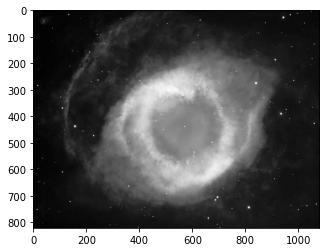

FCFS max pixel: 7
FCFS min pixel: 0 

Image after FCFS


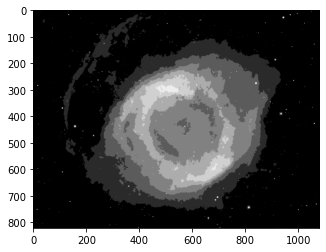

Histogram after FCFS


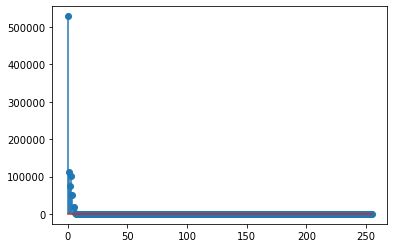

Original histogram


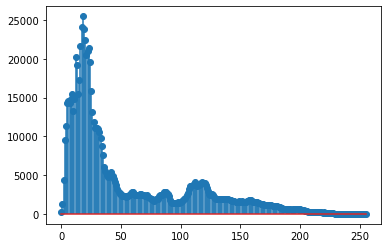

In [6]:
b = img.max()
a = img.min()
print('Original image max pixel: {}'.format(b))
print('Original image min pixel: {}\n'.format(a))
k = bit_req
p = (k-1)/(b-a)
l = -a*p
j = ((img*p)+l).astype(int)
result = np.where(j>255, 255, j)
fcfs = np.where(result<0, 0, result)

plt.imshow(img, cmap='Greys_r')
print('Grayscale Image (original)')
plt.show()

print('FCFS max pixel: {}'.format(fcfs.max()))
print('FCFS min pixel: {} \n'.format(fcfs.min()))
plt.imshow(fcfs, cmap='Greys_r')
print('Image after FCFS')
plt.show()
hist = histogram(fcfs)
plt.stem(hist)
print('Histogram after FCFS')
plt.show()
hist_ori = histogram(img)
print('Original histogram')
plt.stem(hist_ori)
plt.show()

<b>2.3  Log magnitude compression </b>

Grayscale Image (original)


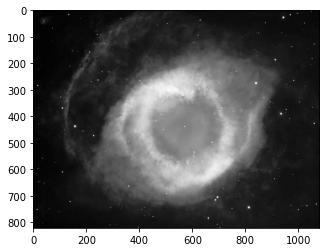

Log magnitude compression image


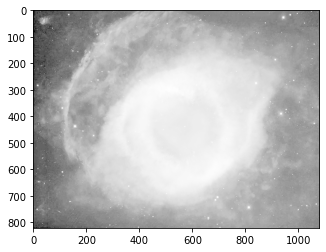

Original histogram


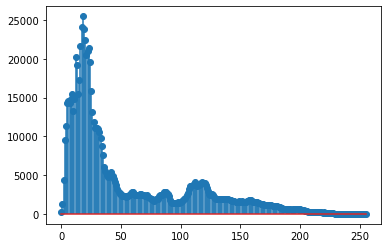

Histogram after log magnitude compression


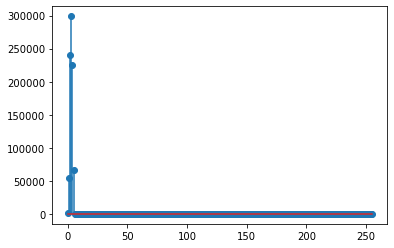

In [7]:
res = np.log(1+img)
plt.imshow(img, cmap='Greys_r')
print('Grayscale Image (original)')
plt.show()
plt.imshow(res,cmap='Greys_r')
print('Log magnitude compression image')
plt.show()
hist_log = histogram(res)
plt.stem(hist_ori)
print('Original histogram')
plt.show()
plt.stem(hist_log)
print('Histogram after log magnitude compression')
plt.show()

FCFS over histogram flattening


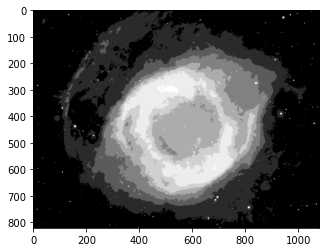

Histogram flattened 


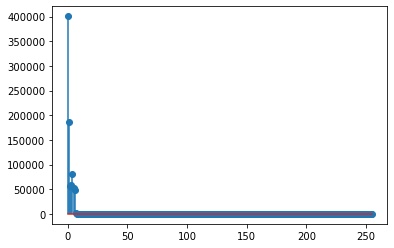

Original histogram


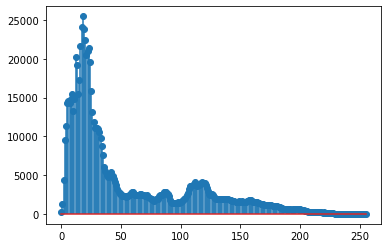

In [8]:
# hist = histogram(img)
h, w = img.shape

a = np.zeros((256,),dtype=np.float16)
b = np.zeros((256,),dtype=np.float16)

for i in range(w):
    for j in range(h):
        g = img[j][i]
        a[g] = a[g]+1

for i in range(256):
    for j in range(i+1):
        b[i] += a[j] * (1.0/(h*w))
    b[i] = round(b[i] * 255)

b=b.astype(int)

for i in range(w):
    for j in range(h):
        g = img[j][i]
        img[j][i]= b[g]
        
# FCFS
b = img.max()
a = img.min()
k = bit_req
p = (k-1)/(b-a)
l = -a*p
j = ((img*p)+l).astype(int)
result = np.where(j>255, 255, j)
fcfs = np.where(result<0, 0, result)

plt.imshow(fcfs,cmap='Greys_r')
print('FCFS over histogram flattening')
plt.show()
histo = histogram(fcfs)
plt.stem(histo)
print('Histogram flattened ')
plt.show()

plt.stem(hist_ori)
print('Original histogram')
plt.show()

# Question 3: Zooming

<b> 3.1 Nearest neighbour zoom (1.5x) </b> 

Grayscale Image (original)


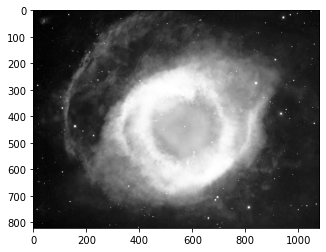

Zoomed Image (1.5x)


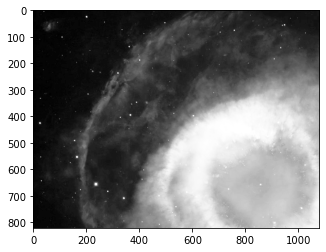

Time taken: 1.28 secs


In [9]:
start = time.time()

w = img.shape[1]
h = img.shape[0]

factor = 1.5 #change factor of zooming here

newW = int(w*factor)
newH = int(h*factor)

ratioW = w/newW
ratioH = h/newH

newimg = np.zeros(img.shape, img.dtype)

for i in range(newimg.shape[0]):
    for j in range(newimg.shape[1]):
        x = round(ratioH*i)
        y = round(ratioW*j)
        newimg[i][j] = img[x][y]

plt.imshow(img, cmap='Greys_r')
print('Grayscale Image (original)')
plt.show()
plt.imshow(newimg, cmap='Greys_r')
print('Zoomed Image (1.5x)')
plt.show()

end = time.time()
print('Time taken: {0:.2f} secs'.format(end - start))

<b>3.2 Bilinear Interpolation (1.5x) </b>

Grayscale Image (original)


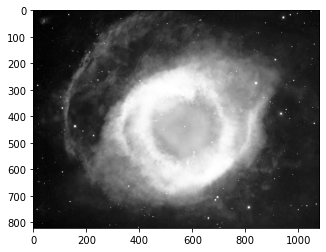

Zoomed Image 1.5x


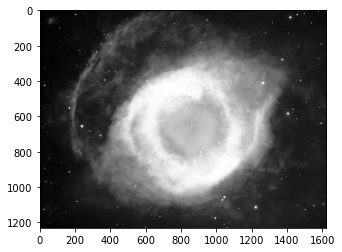

Time taken: 30.04 secs


In [10]:
start = time.time()

def linear_inter(x, y, t):

    temp1 = x[1]*((y[0]-t[0])/(y[0]-x[0]))
    temp2 = y[1]*((t[0]-x[0])/(y[0]-x[0]))

    return temp1+temp2

def bilinear_inter(a, b, c, d, unknown):

    if a[0] == c[0]:
        return linear_inter((a[1], a[2]), (b[1], b[2]), (t[1], t[2]))

    if a[1] == b[1]:
        return linear_inter((a[0], a[2]), (c[0], c[2]), (t[0], t[2]))

    R1 = linear_inter((a[0], a[2]), (c[0], c[2]), (t[0], t[2]))
    R2 = linear_inter((b[0], b[2]), (d[0], d[2]), (t[0], t[2]))
    P = linear_inter((a[1], R1), (b[1], R2), (t[1], t[2]))

    return P

w = img.shape[1]
h = img.shape[0]

fac = 1.5 #change zoom factor here
newW = int(w*fac)
newH = int(h*fac)

ratioW = w/newW
ratioH = h/newH

newImg = np.zeros((newH, newW), np.uint8)

for i in range(newImg.shape[0]):
    for j in range(newImg.shape[1]):

        x = ratioH * i
        y = ratioW * j

        x1 = math.floor(x)
        x2 = math.ceil(x)
        y1 = math.floor(y)
        y2 = math.ceil(y)

        x1 = x1-1 if x1 == h else x1
        x2 = x2-1 if x2 == h else x2
        y1 = y1-1 if y1 == w else y1
        y2 = y2-1 if y2 == w else y2

        pt1 = (x1, y1, img[x1][y1])
        pt2 = (x1, y2, img[x1][y2])
        pt3 = (x2, y1, img[x2][y1])
        pt4 = (x2, y2, img[x2][y2])
        t = (x, y, 0)

        if pt1[0] == pt3[0] and pt1[2] == pt2[2]:
            newImg[i][j] = img[int(x)][int(y)]
        else:
            newImg[i][j] = bilinear_inter(pt1, pt2, pt3, pt4, t)

plt.imshow(img, cmap='Greys_r')
print('Grayscale Image (original)')
plt.show()    
plt.imshow(newImg,cmap='Greys_r')
print('Zoomed Image 1.5x')
plt.show()

end = time.time()
print('Time taken: {0:.2f} secs'.format(end - start))

<b> Zoomed image by bilinear interpolation is much smoother compared to nearest neighbor. However, the nearest neighbour zooming is much faster as is shown by the time taken </b>